<a href="https://colab.research.google.com/github/NajmehNyr/2AFC-Color-Discrimination-Task/blob/main/colorbar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# PsychopyRGB to RGB255
def PsyTo255(rgbpsy):
    return tuple(int((i + 1) * 127.5) for i in rgbpsy)

# PsychopyRGB to RGB1
def PsyTo1(rgbpsy):
    return tuple((i + 1) / 2 for i in rgbpsy)

In [ ]:
# Define colors in psychopy RBB system
blue = (0, 0, 1); yellow = (1, 1, 0)
absBlue = (-1, -1, 1); absYellow = (1, 1, -1)

# colors for in between the main colors
between = np.linspace(0, 1, 256)

# Create the base colormap
preCmap = LinearSegmentedColormap.from_list("preCmap", [PsyTo1(yellow), PsyTo1(blue)])

# Combine the colors with the absolute colors of the extends
colors = [PsyTo1(absYellow)] + list(preCmap(between)) + [PsyTo1(absBlue)]
cmap = LinearSegmentedColormap.from_list("cmap", colors)

#normalize the whole cmap
norm = Normalize(vmin=5, vmax=10)

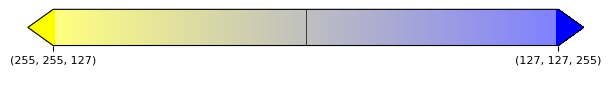

In [ ]:
# Plot data
fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', extend='both', label=' \n')

# Define the tick locations at the ends and the main range
tickLoc = [5, 10]; cbar.set_ticks(tickLoc)

# Define the tick labels with RGB values
tickLab = [str(PsyTo255(yellow)), str(PsyTo255(blue))]
cbar.set_ticklabels(tickLab, fontsize=8)

# Add a vertical line in the middle of the colorbar
middle = (5+10) / 2
ax.axvline(middle, color='black', linestyle='-', linewidth=0.5);